In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

## 0. Outline
1. Introduction \
    1.1 Aim of the project \
    1.2 Dataset description \
    1.3 Sample design \
    1.4 Research Questions
2. Exploratory Data Analysis
3. Answering Questions
4. Conclusion \
    4.1 Summary \
    4.2 Limitations and Suggestions \
    4.3 Future work

## 1. Introduction

### 1.1. Aim of the project
Throughout history, social drinking was a popular activity, and it continues to be so up until these days. It is probably bad news for consumers because alcohol is harmful to health but definitely good news for the wine industry. In order to meet the demand, the industry produces a large variety of wines, and its price usually depends on a rather abstract concept of wine appreciation by wine tasters. Assessing wine quality in this way might be volatile to some extent because it is not clear what exactly makes certain wine taste good. In order to make things more clear, analyzing chemical properties of a wine could be useful. It is particularly interesting to investigate the relationship between the quality of wine and its chemical properties.

### 1.2 Dataset description
The dataset for this project was retrieved from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and is called *Wine Quality Data Set*. The dataset was collected by Cortez et al. in 2009 for research purposes. It describes red and white variants of the Portuguese *Vinho Verde* wine. For the purpose of this project only red wine will be investigated.

In [2]:
# read the dataset
df = pd.read_csv('red-wine-dataset.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


The dataset contains 1599 instances, and 12 variables. Let's see what does each variable represent. <br>
<br>
**Input variables** <br>
*fixed acidity* - most acids involved with wine or fixed or nonvolatile (do not evaporate readily). <br>
*volatile acidity* -  the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. <br>
*citric acid* - found in small quantities, citric acid can add ‘freshness’ and flavor to wines. <br>
*residual sugar* - the amount of sugar remaining after fermentation stops. <br>
*chlorides* - the amount of salt in the wine. <br>
*free sulfur dioxide* - the free form of $SO_2$ exists in equilibrium between molecular $SO_2$ and bisulfite ion; it prevents microbial growth and the oxidation of wine.<br>
*total sulfur dioxide* - amount of free and bound forms of $SO_2$; in low concentrations, $SO_2$ is mostly undetectable in wine, but at free $SO_2$ concentrations over 50 ppm, $SO_2$ becomes evident in the nose and taste of wine. <br>
*density* - the density of water is close to that of water depending on the percent alcohol and sugar content. <br>
*pH* - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. <br>
*sulphates* - a wine additive which can contribute to $SO_2$ levels, wich acts as an antimicrobial and antioxidant. <br>
*alcohol* - the percent alcohol content of the wine. <br>
<br>
**Output variable** <br>
*quality* - wine experts graded the wine quality between 0 (very bad) and 10 (very excellent).

### 1.3 Sample design
As it was mentioned in UCI Machine Learning Repository dataset description the classes (quality) are not balanced (e.g. there are munch more normal wines than excellent or poor ones). Let's see if that is the case for the red wine dataset.

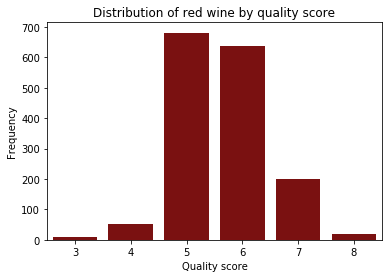

In [3]:
# distribution in quality
sns.countplot(x = 'quality', data = df, color="darkred")
plt.ylabel("Frequency")
plt.xlabel("Quality score")
plt.title("Distribution of red wine by quality score");

The dataset is not balanced across classes. In order to make it more balanced, let's group the classes into two general classes, namely low-quality (quality <= 5), high-quality (quality > 5).

In [4]:
df["quality label"] = df["quality"].apply(lambda x: 'low' if x <= 5 else 'high')
df[["quality","quality label"]].head()

,quality,quality label
0,5,low
1,5,low
2,5,low
3,6,high
4,5,low


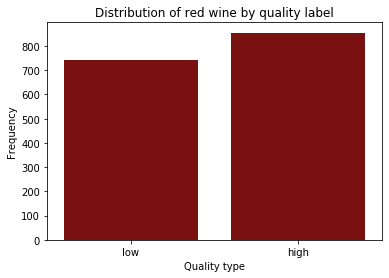

In [5]:
# distribution in quality label
sns.countplot(x="quality label", data=df, color="darkred")
plt.ylabel("Frequency")
plt.xlabel("Quality type")
plt.title("Distribution of red wine by quality label");

The classes are now somewhat balanced. The final dataset contains:
* 9 continuous numerical variables (*fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, density, pH, sulphates, alcohol*);
* 2 discrete numerical variables (*free sulfur dioxide, total sulfur dioxide*);
* 2 categorical variables (*quality, quality label*).

### 1.4 Research Questions

Since the aim of this project is to understand the relationship between the quality of red wine and its chemical properties, I believe the following set of questions will help to come up with interesting relations, and will help to understand the difference between high-quality and low-quality red wine.
1. What is the difference between low-quality and high-quality red wine in mean acidity, which include fixed acidity, volatile acidity, citric acid, and pH?
2. Does alcohol have a positive correlation with red wine quality?
3. What is the proportion of high-quality red wines whose alcohol concentration is larger than the average? What is the proportion of low-quality red wines whose alcohol concentration is lower than the average?

## 2. Exploratory Data Analysis

Let's start the exploratory data analysis from summary statistics. It will help us to understand the data in general terms. 

In [6]:
# summary statistics by quality label
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.873671,10.458467,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467167,32.894739,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
# null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality label           0
dtype: int64

Some observations from a summary statistics:
* There are no null values;
* All features, except *free sulfur dioxide* and *total sulfur dioxide* have low variability;
* Mean is larger than median, which might indicate that there are outliers;
* No red wine has quality 1, 2, 9 and 10. <br>

Let's now observe the distribution of each feature with a univariate histograms and box plots.

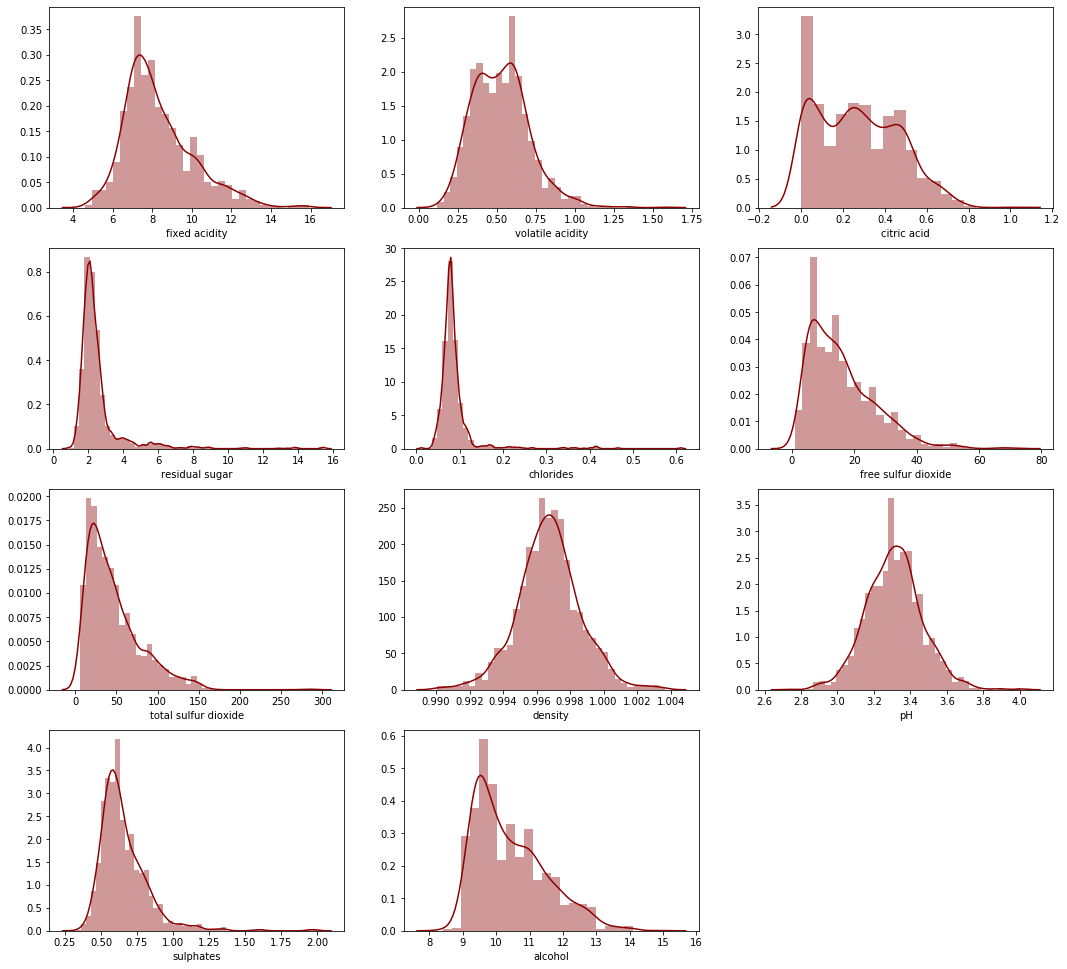

In [8]:
# distribution matrix
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

plt.figure(figsize = (18, 17))
for i in range(0, len(cols)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df[cols[i]], color="darkred");

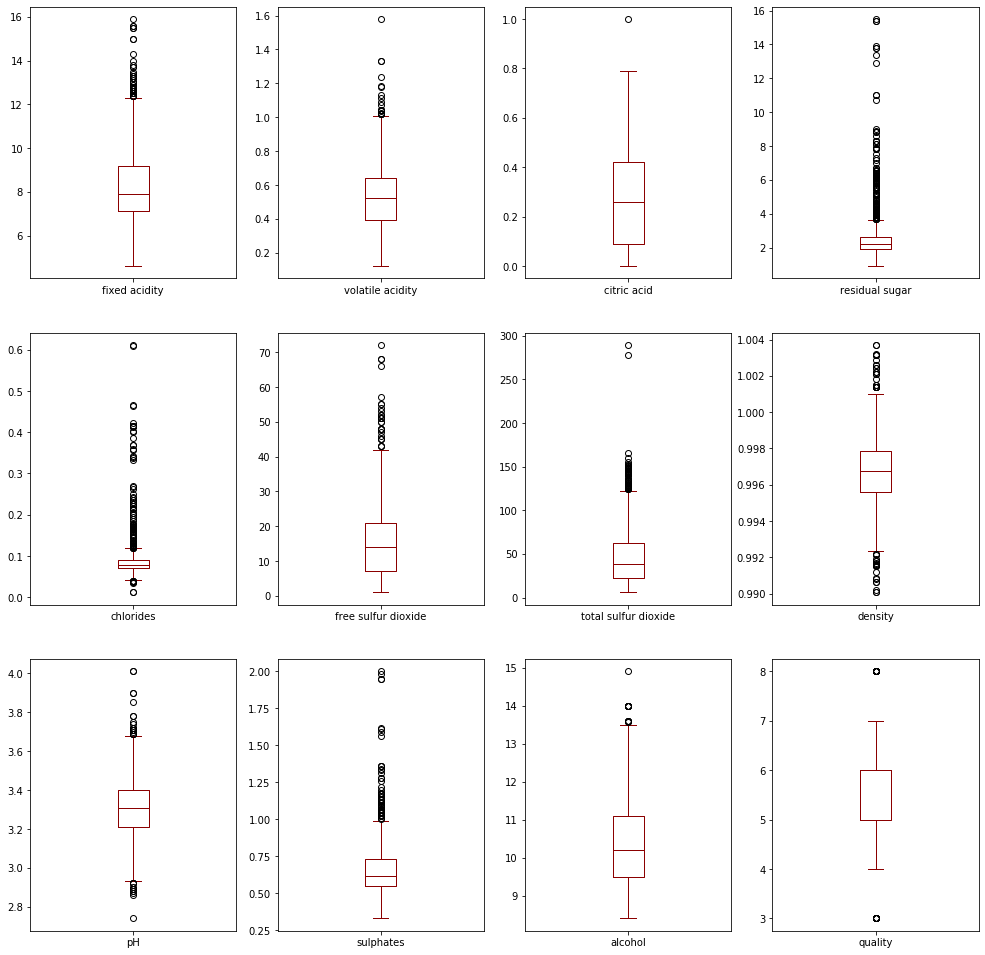

In [9]:
# outliers
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(17,23), color="darkred");

As can be seen from the histograms and box plots:
* Approximately normally distributed features are *density* and *pH*;
* Most of the features are positively skewed;
* The distribution of *alcohol* and *citric acid* has an irregular shape;
* All features have outliers, and they are mostly on the larger side;
* If the outliers are handled properly, the distribution of *fixed acidity, volatile acidity* and *sulphates* might become approximately normally distributed.

## 3. Answering Questions

### 3.1. What is the difference between low-quality and high-quality red wine in mean acidity, which include fixed acidity, volatile acidity, citric acid, and pH?

Acids are one of the fundamental properties of wine and contribute greatly to its taste. To illustrate:
* a wine lacking *fixed acids* will feel flabby and flat, and maybe even soapy;
* *volatile acidity* at large amounts can give an unpleasant vinegar taste;
* *citric acidity* gives a fresh flavor to wine;
* if *pH* is higher, the wine will be softer and rounder, and if it is lower, it will feel more linear. <br>

Therefore it is interesting to start investigating the difference between high-quality and low-quality red wine specifically by looking at its acidity. In order to answer the question, we will look at the distribution of each acidity parameter for low-quality and high-quality red wine separately and will compare their means.

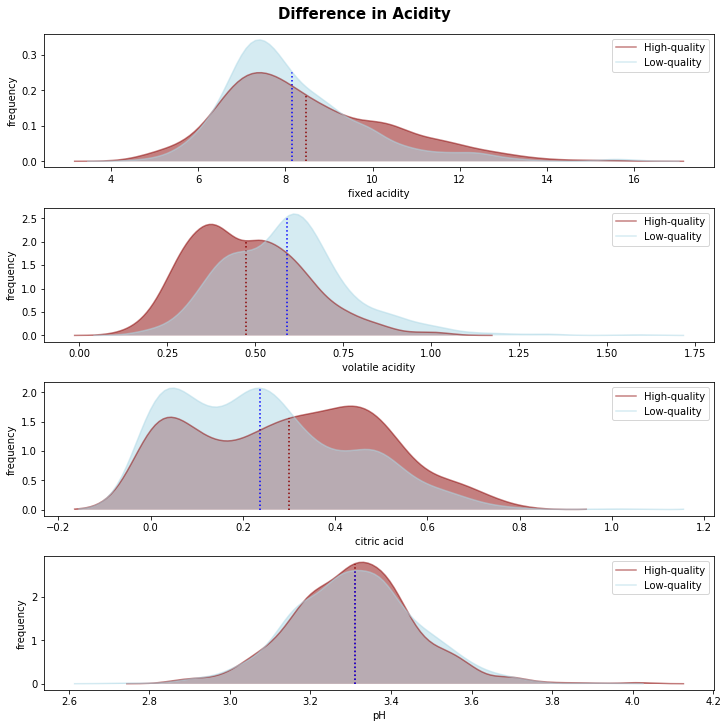

In [10]:
# creating a grid for subplots
fig, ax = plt.subplots(4, 1, constrained_layout=True, figsize=(10,10))
fig.suptitle('Difference in Acidity', fontweight='bold', fontsize=15)

acidity = ["fixed acidity", "volatile acidity", "citric acid", "pH"]

for i in range(4):
    # plotting the distributions of certain acidity parameter
    sns.kdeplot(df[df["quality label"]=="high"][acidity[i]], alpha=0.5, color="darkred", shade = True, label="High-quality", ax = ax[i])
    sns.kdeplot(df[df["quality label"]=="low"][acidity[i]], alpha=0.5, color="lightblue", shade = True, label="Low-quality", ax = ax[i])
    ax[i].set_xlabel(acidity[i])
    ax[i].set_ylabel("frequency")
    
    # indicating the mean of a high-quality distribution
    kdeline_high = ax[i].lines[0]
    mean_high = df[df["quality label"]=="high"][acidity[i]].mean()
    xs_high = kdeline_high.get_xdata()
    ys_high = kdeline_high.get_ydata()
    height_high = np.interp(mean_high, xs_high, ys_high)
    ax[i].vlines(mean_high, 0, height_high, color="darkred", ls=':')
    
    # indicating the mean of a low-quality distribution
    kdeline_low = ax[i].lines[1]
    mean_low = df[df["quality label"]=="low"][acidity[i]].mean()
    xs_low = kdeline_low.get_xdata()
    ys_low = kdeline_low.get_ydata()
    height_low = np.interp(mean_low, xs_low, ys_low)
    ax[i].vlines(mean_low, 0, height_low, color="blue", ls=':');

From the plots above, it can be concluded that:
1. High-quality mean *fixed acidity* > low-quality mean *fixed acidity*. This means that the texture of a low-quality wine tends to be more flabby and flat compared to a high-quality wine. 
2. High-quality mean *volatile acidity* < low-quality mean *volatile acidity*. This means that low-quality wine tends to have an unpleasant vinegar flavor. 
3. High-quality mean *citric acidity* > low-quality mean *citric acidity*. This means that high-quality wine is more refreshing in taste.
4. *pH* seems to have no effect on the quality of the wine because in both cases (low and high quality) distribution and the means of this parameter are almost identical.

### 3.2. Does alcohol have a positive correlation with red wine quality?

Wine is an alcoholic beverage, and the amount of alcohol present in its composition is also very important when analyzing its quality. We interpret alcohol using many different taste receptors which is why it can taste bitter, sweet, spicy, and oily all at once. It is interesting to know whether high-quality wine tends to have a larger amount of alcohol.

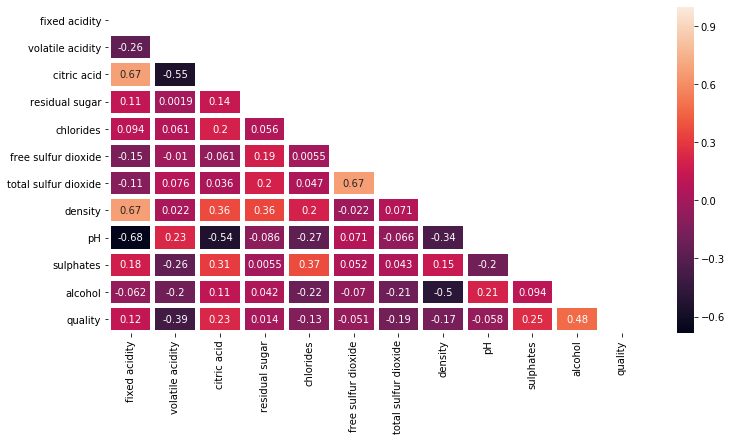

In [11]:
# correlation matrix for red wine
corr = df.corr()
matrix = np.triu(corr) # creating a mask to further remove repeating terms if a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, mask=matrix, linewidths=4);

According to the correlation matrix, it is true that *alcohol* has a positive correlation with *quality* (0.48). However, there are several remarks that must be done based on these results:
1. Correlation does not imply causation. It means that even though there is a positive correlation between quality and the amount of alcohol, it does not mean that a larger amount of alcohol increases the quality of wine;
2. Correlation between *quality* and *alcohol* is 0.48. It is the largest quantity among other correlation coefficients, however, it is not even close to 1. There are multiple possible explanations for this. First, Pearson's correlation might not work properly because *quality* is a categorical variable. Second, there might be a nonlinear relationship between *quality* and *alcohol*. <br> 

To see if there is indeed a positive correlation, we could investigate the proportion of red wines whose alcohol is higher than the average alcohol of all wines. If there is a positive correlation, then this proportion should be larger relative to the other half. The same procedure could be done with low-quality wines. If there is a positive correlation, then the proportion of low-quality wines whose alcohol is lower than the average alcohol of all wines should be larger relative to the other half. Let's investigate it in the next question.

### 3.3 What is the proportion of high-quality red wines whose alcohol concentration is larger than the average? What is the proportion of low-quality red wines whose alcohol concentration is lower than the average?

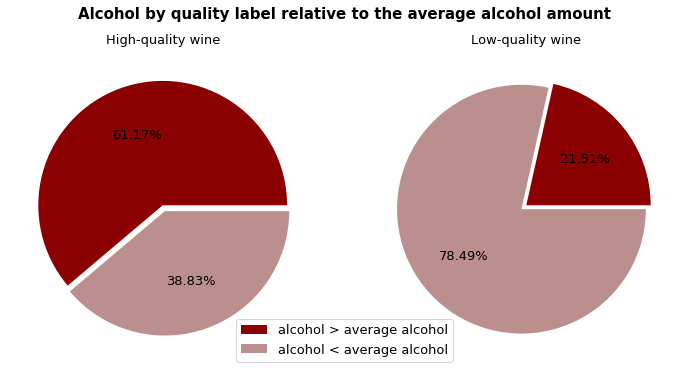

In [12]:
# labeling each wine according to its alcohol amount:
# if it is smaller than mean alcohol of all wines label if as "smaller", otherwise "larger"
df["alcohol trend"] = df["alcohol"].apply(lambda x: 'smaller' if x < df["alcohol"].mean() else 'larger')

# creating a grid for subplots
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10,5))
fig.suptitle('Alcohol by quality label relative to the average alcohol amount', fontweight='bold', fontsize=15)

labels = ["alcohol > average alcohol", "alcohol < average alcohol"]
colors = ['darkred', 'rosybrown']
explode = (0, 0.05) # to split pie chart slices

# group low and high-quality red wine by "smaller than average alcohol" or "larger than average alcohol"
# and count the number of wines in each group
df_high = pd.DataFrame(df[df["quality label"]=="high"].groupby("alcohol trend").count()["quality label"])
df_low = pd.DataFrame(df[df["quality label"]=="low"].groupby("alcohol trend").count()["quality label"])

ax[0].pie(df_high["quality label"], autopct = "%.2f%%", colors=colors, textprops={'fontsize': 13}, explode=explode)
ax[0].set_title("High-quality wine", fontsize=13)

ax[1].pie(df_low["quality label"], autopct = "%.2f%%", colors=colors, textprops={'fontsize': 13}, explode=explode)
ax[1].set_title("Low-quality wine", fontsize=13)

fig.legend(labels, loc='lower center', fontsize=13);

As we can see, the proportion of high-quality red wines with alcohol larger than the average constitutes 61.17%, which means that there are more wines with larger amount of alcohol than wines with smaller amount of alcohol. We also can observe that the proportion of low-quality wines with alcohol smaller than the average is 78.49%, which means that there are more wines with smaller amount of alcohol than wines with larger amount of alcohol. From this, we can conclude that most probably there is a positive correlation between quality of wine and the amount of alcohol in it.

## 4. Conclusion

### 4.1 Summary

The aim of the following project was to investigate the relationship between the quality of wine and its chemical properties. In order to start the investigation, three research questions were asked:<br>

*1. What is the difference between low-quality and high-quality red wine in mean acidity, which include fixed acidity, volatile acidity, citric acid, and pH?* <br>
To answer this question, 4 separate distribution graphs were plotted. Each graph represented a separate acidity parameter and was divided into low and high-quality wines. Also, the means of each distribution were indicated. The graphs showed that high-quality red wines have higher fixed and citric acidity, and lower volatile acidity compared to low-quality red wines. All these make high-quality red wine taste better than low-quality red wine. Apart from these, pH was the same for both qualities, which could mean that pH does not contribute to the quality of the wine.

*2. Does alcohol have a positive correlation with red wine quality?* <br>
To answer this question, a Pearson's correlation matrix was utilized. Based on this matrix, alcohol had the largest positive correlation with the quality compared to other chemical properties. However, since these results might be misleading, the relationship between alcohol and the quality of the wine was further investigated in Question 3.

*3. What is the proportion of high-quality red wines whose alcohol concentration is larger than the average? What is the proportion of low-quality red wines whose alcohol concentration is lower than the average?* <br>
The answer to this question resulted in the verification of a positive correlation between the quality of wine and the amount of alcohol it contains. This is because two pie charts that were utilized during investigation showed that high-quality wines tend to have a larger number of wines whose alcohol is larger than the average alcohol amount in all wines. It also showed that low-quality wines tend to have a larger number of wines whose alcohol is smaller than the average alcohol amount in all wines.

### 4.2 Limitations and Suggestions

There are several limitations with this project, and they are mostly related to the dataset that was used:
* The dataset seems to be outdated. UCI Machine Learning Repository published the *Wine Quality Data Set* in 2009, which is more than a decade ago. It stands to reason that during this time, winemaking techniques were improved, as well as the quality assessment criteria. 
* Dividing the dataset into "low-quality" and "high-quality" wines might have led to inaccurate results. Such rapid division into two large subgroups neglects some key details in the quality of the wine. Maybe it would have been better to divide the dataset into three subgroups, namely "low", "medium", and "high-quality" red wines.
* As it was mentioned in the *Exploratory Data Analysis* part, every feature in the dataset had outliers, and some of them were severe. During the course of this project, the outliers were not handled in any way, which could also have led to inaccurate results. It would have been better if the outliers were removed in some proper way.

If I would start over, I would take into consideration the remarks made above, and also would have normalized the data in some way (e.g. Box-Cox transformation, and removing outliers). From the *Exploratory Data Analysis* part, the distribution of almost all features was not normal, and it prevented the use of statistical tests, such as independent t-test or ANOVA. These tests are very helpful in making more accurate and reliable conclusions about the data, however, they require certain assumptions to be satisfied, one of which is the normality of the data.

### 4.3 Future work

A possible continuation of the following project can be:
1. Analyzing other chemical properties, namely *residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density* and *sulphates*, and investigating their relationship with the wine quality;
2. Comparing red wine's chemical properties with white wine ones;
3. Building a categorical machine learning model, such as Logistic Regression, k-NN, or Decision Trees, in order to predict quality label (low, high quality), quality score (1-10), and maybe the type of the wine (red or white). It is also possible to build a regression model in order to predict numerical values for certain chemical properties.